<a href="https://colab.research.google.com/github/imdadadabong/practicecode/blob/main/%ED%86%B5%EA%B3%84%ED%95%99_%EA%B8%B0%EC%B4%88_4%EC%A3%BC%EC%B0%A8_5%EC%A3%BC%EC%B0%A8_%ED%9A%8C%EA%B7%80%2C_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #데이터 분석에서 자주 사용 되는 라이브러리
import numpy as np # 데이터 계산을 빠르게 수행 할 수 있도록 돕는 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns #시각화라이브러리
from sklearn.linear_model import LinearRegression #선형 회귀 모델
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# **단순선형회귀**

In [ ]:
#예시데이터 생성
np.random.seed(0)
X = 2*np.random.rand(100,1)
Y = 4+3 * X+np.random.randn(100,1)

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

#단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, Y_train)

#테스트 데이터로 예측 수행
Y_pred = model.predict(X_test)

#회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

회귀 계수: [[2.9902591]]
절편: [4.20634019]


In [ ]:
#모델평가
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

평균 제곱 오차(MSE): 0.9177532469714291
결정 계수(R2): 0.6521157503858556


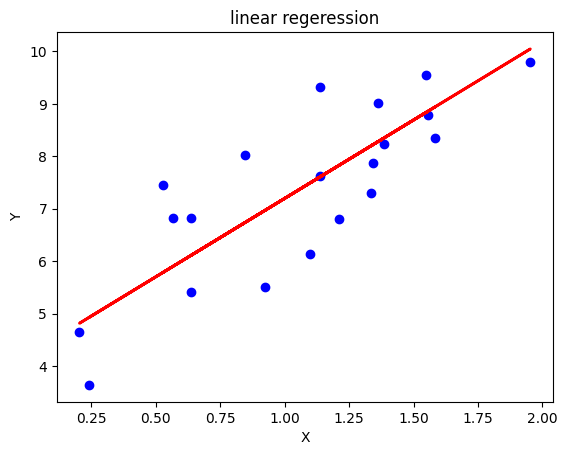

In [ ]:
#시각화
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.title('linear regeression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# **다중선형회귀**

In [ ]:
#예시 데이터 생성
#다양한 광고비와 매출간의 관계 분석, 현재 광고비를 바탕으로 예상 되는 매출을 예측 가능

data = {'TV':np.random.rand(100)*100,
        'Radio':np.random.rand(100)*50,
        'Newspaper':np.random.rand(100)*30,
        'Sales':np.random.rand(100)*100}
df=pd.DataFrame(data)

#독립변수(X)와 종속변수(Y)설정
X= df[['TV','Radio','Newspaper']]
y= df['Sales']

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

#다중선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, Y_train)

#테스트 데이터로 예측 수행
Y_pred = model.predict(X_test)

#회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)


회귀 계수: [[ 0.00649016 -0.00936695  0.04301963]]
절편: [6.18845154]


In [ ]:
#모델평가
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

평균 제곱 오차(MSE): 3.2213321674072235
결정 계수(R2): -0.22108064178960585


범주형 변수

In [ ]:
#예시 데이터 생성
data = {'Gender':['Male', 'Female', 'Female', 'Male', 'Male'],
        'Experience':[5, 7, 10, 3, 8],
        'Salary':[50, 60, 65, 40, 55]}
df = pd.DataFrame(data)

#범주형 변수 더미 변수로 변환
df = pd.get_dummies(df, drop_first=True)

#독립변수(X)와 종속변수(Y)설정
X= df[['Experience','Gender_Male']]
y= df['Salary']

#단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X,y)

#예측
y_pred = model.predict(X)

#회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

#모델평가
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

회귀 계수: [ 2.57281553 -6.01941748]
절편: 40.63106796116506
평균 제곱 오차(MSE): 3.2213321674072235
결정 계수(R2): -0.22108064178960585


**다향 회귀 **

평균 제곱 오차(MSE): 3.2213321674072235
결정 계수(R2): -0.22108064178960585


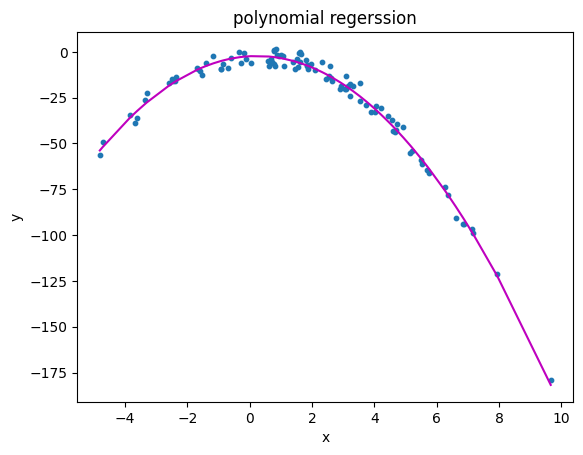

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#예시 데이터 생성
np.random.seed(0)
x= 2-3 * np.random.normal(0,1,100)
y= x-2 * (x ** 2) + np.random.normal(-3,3,100)
x=x[:,np.newaxis]

#다향회귀 (2차)
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)

#모델평가
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

#시각화
plt.scatter(x,y,s=10)
#정렬된 x 값에 따른 Y값 예측
sorted_zip = sorted(zip(x,y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,color='m')
plt.title('polynomial regerssion')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


피어슨 상관계수